In [67]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [68]:
#Import the main data set
POdata=pd.read_csv('testuploadvaluesremoved.csv')

<p style="font-family: Arial; font-size:1.4em;color:green;"> Exploratory Data Analysis  </p>

In [69]:
#check the data types of each column
POdata.dtypes

PO Number                int64
Subcategory             object
PO Create Date          object
Receipted Date          object
Rationalised Sender    float64
Receiver                object
Lane Profile            object
Receipted Month          int64
Order Type              object
Material Number          int64
Material Name           object
PO $ Amt               float64
Qty Receipted BUOM       int64
dtype: object

In [70]:
#view the first 5 rows
POdata.head()

,PO Number,Subcategory,PO Create Date,Receipted Date,Rationalised Sender,Receiver,Lane Profile,Receipted Month,Order Type,Material Number,Material Name,PO $ Amt,Qty Receipted BUOM
0,4301826361,Apron,1/12/2021,7/12/2021,NaN,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,202112,A. DC SUPPLY,10015125,Apron:Util:Plas:Ns:Guardian:80x140cm:Wht,NaN,640000
1,4301886617,Apron,30/12/2021,1/01/1900,NaN,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,190001,A. DC SUPPLY,10015125,Apron:Util:Plas:Ns:Guardian:80x140cm:Wht,NaN,0
2,4301885516,Apron,30/12/2021,1/01/1900,NaN,"Distribution Centre, North (To:Rec. on Dock",Supplier:NQDC,190001,A. DC SUPPLY,10015125,Apron:Util:Plas:Ns:Guardian:80x140cm:Wht,NaN,0
3,4301943597,Apron,31/01/2022,24/02/2022,NaN,Rural & Community Health: WB:Correctional Cen,Supplier:HHS,202202,C. DIRECT SUPPLY,10015125,Apron:Util:Plas:Ns:Guardian:80x140cm:Wht,NaN,500
4,4301947250,Apron,2/02/2022,8/02/2022,NaN,Maryborough Hospital:Operational Serv,Supplier:HHS,202202,C. DIRECT SUPPLY,10015125,Apron:Util:Plas:Ns:Guardian:80x140cm:Wht,NaN,500


In [71]:
#remove unecessary features (PO Create date, Receipted Month, Material Name, Receipted Date
POdata = POdata.drop('PO Create Date', axis=1)
POdata = POdata.drop('Receipted Month', axis=1)
POdata = POdata.drop('Material Name', axis=1)
POdata = POdata.drop('Receipted Date', axis=1)
POdata = POdata.drop('Rationalised Sender', axis=1)
POdata = POdata.drop('PO $ Amt', axis=1)

In [72]:
#check the data now looks as expected
POdata.head()

,PO Number,Subcategory,Receiver,Lane Profile,Order Type,Material Number,Qty Receipted BUOM
0,4301826361,Apron,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10015125,640000
1,4301886617,Apron,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10015125,0
2,4301885516,Apron,"Distribution Centre, North (To:Rec. on Dock",Supplier:NQDC,A. DC SUPPLY,10015125,0
3,4301943597,Apron,Rural & Community Health: WB:Correctional Cen,Supplier:HHS,C. DIRECT SUPPLY,10015125,500
4,4301947250,Apron,Maryborough Hospital:Operational Serv,Supplier:HHS,C. DIRECT SUPPLY,10015125,500


In [73]:
#View the last 5 rows
POdata.tail()

,PO Number,Subcategory,Receiver,Lane Profile,Order Type,Material Number,Qty Receipted BUOM
117361,81581648,Thumb-up_Apron,A978 QAS Station - Wynnum,SEQDC:QAS,I. DEMAND QAS,10041523,150
117362,81581648,Thumb-up_Apron,A978 QAS Station - Wynnum,SEQDC:QAS,I. DEMAND QAS,10024168,150
117363,81583103,Thumb-up_Apron,AQ901 QAS - QCESA - Para Education,SEQDC:QAS,I. DEMAND QAS,10041523,75
117364,81579977,Thumb-up_Apron,A824 QAS Station - Samford,SEQDC:QAS,I. DEMAND QAS,10041523,60
117365,1000519903,Thumb-up_Apron,A863 QAS Station - Sthport,SEQDC:QAS,I. DEMAND QAS,10041523,150


In [74]:
#Rename the column Qty Receipted BUOM to have no spaces
POdata.rename(columns={'Qty Receipted BUOM': 'Qty_Receipted_BUOM'}, inplace=True)

In [75]:
#rename the column Order Type to have no spaces
POdata.rename(columns={'Order Type': 'Order_Type'}, inplace=True)

In [76]:
#rename the column Order Type to have no spaces
POdata.rename(columns={'Lane Profile': 'Receiver_Lane'}, inplace=True)

<p style="font-family: Arial; font-size:1.4em;color:green;"> Normalise the Data  </p>

In [77]:
# Create a mask to find all rows with 0
mask = POdata['Qty_Receipted_BUOM'] == 0
POdata.loc[mask, 'Qty_Receipted_BUOM'] = np.NaN

In [78]:
#check that there are now NaN values in Qty_receipted_BUOM columns
POdata.head(2)

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM
0,4301826361,Apron,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10015125,640000.0
1,4301886617,Apron,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10015125,NaN


In [79]:
#count the NaN values - there should now be some
POdata.isnull().sum()

PO Number                0
Subcategory              0
Receiver                 0
Receiver_Lane            0
Order_Type               0
Material Number          0
Qty_Receipted_BUOM    3676
dtype: int64

In [80]:
#remove NaN using dropna
POdata.dropna(how='any', inplace=True)

In [81]:
#check there are no longer any nan values
POdata.isnull().sum()

PO Number             0
Subcategory           0
Receiver              0
Receiver_Lane         0
Order_Type            0
Material Number       0
Qty_Receipted_BUOM    0
dtype: int64

In [82]:
#view the data types
POdata.dtypes

PO Number               int64
Subcategory            object
Receiver               object
Receiver_Lane          object
Order_Type             object
Material Number         int64
Qty_Receipted_BUOM    float64
dtype: object

Data types are as expected
PO number and Material Number are integers
qty receipted and PO $ Amt are both Floats
The rest are objects 

In [83]:
# Create a boolean column that is True for rows where there is a CSR item
POdata['Not_CSR_Item'] = POdata['Subcategory'].isin(['Not_in_CSR'])

In [84]:
# Create a boolean column that is True for rows where there is direct purchasing
POdata['Direct_Purchasing'] = POdata['Order_Type'].isin(['C. DIRECT SUPPLY'])

In [85]:
#view the header to make sure it's worked as expected
POdata.head()

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM,Not_CSR_Item,Direct_Purchasing
0,4301826361,Apron,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10015125,640000.0,False,False
3,4301943597,Apron,Rural & Community Health: WB:Correctional Cen,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
4,4301947250,Apron,Maryborough Hospital:Operational Serv,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
5,4301958897,Apron,Rural & Community Health: TV:Main Store,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
6,4302023811,Apron,Pathology Qld:Logan Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,1000.0,False,True


In [86]:
#sort by Qty Receipted
POdata.sort_values(by="Qty_Receipted_BUOM", ascending=False).head()

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM,Not_CSR_Item,Direct_Purchasing
72772,4301908985,Surgical_Respirator_P2/N95,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10038088,4939920.0,False,False
27768,4301888487,Not_in_CSR,"Distribution Centre, South (Ri:Rec. on Dock",Supplier:SEQDC,A. DC SUPPLY,10430874,4614754.0,True,False
48177,4302574839,Surgical_Mask_L2,"Distribution Centre, South (Ri:Rec. on Dock",Supplier:SEQDC,A. DC SUPPLY,10402182,2784000.0,False,False
72779,4301911841,Surgical_Respirator_P2/N95,"Distribution Centre, South (Ri:Stored offsite",Supplier:SEQDC,A. DC SUPPLY,10063756,2592240.0,False,False
27799,4301907001,Not_in_CSR,"Distribution Centre, South (Ri:Rec. on Dock",Supplier:SEQDC,A. DC SUPPLY,10430873,2000100.0,True,False


In [87]:
#median of general purchases qty received
POdata[POdata.Not_CSR_Item ==True].Qty_Receipted_BUOM.median()

300.0

In [88]:
#view the info of the POdata table 
POdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113690 entries, 0 to 117365
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PO Number           113690 non-null  int64  
 1   Subcategory         113690 non-null  object 
 2   Receiver            113690 non-null  object 
 3   Receiver_Lane       113690 non-null  object 
 4   Order_Type          113690 non-null  object 
 5   Material Number     113690 non-null  int64  
 6   Qty_Receipted_BUOM  113690 non-null  float64
 7   Not_CSR_Item        113690 non-null  bool   
 8   Direct_Purchasing   113690 non-null  bool   
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 7.2+ MB


In [89]:
#number of rows before removing outliers
POdata.shape

(113690, 9)

In [90]:
#Separate the Data into direct and non direct purchasing
NonDirect = POdata[POdata['Order_Type'] != 'C. DIRECT SUPPLY']
Direct = POdata[POdata['Order_Type'] == 'C. DIRECT SUPPLY']

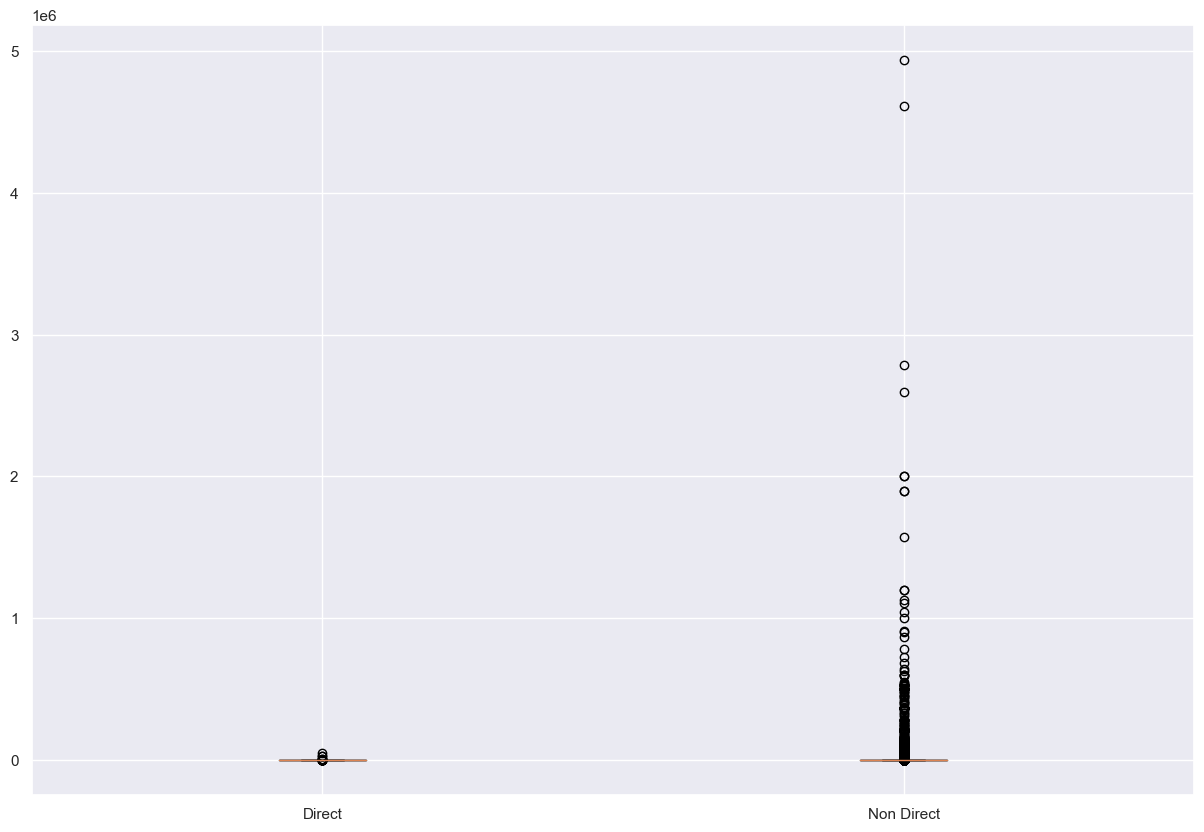

In [91]:
plt.boxplot((Direct['Qty_Receipted_BUOM'], NonDirect['Qty_Receipted_BUOM']), labels=['Direct', 'Non Direct']);



In [92]:
#Normalise the data 

for x in ['Qty_Receipted_BUOM']:
    q75,q25 = np.percentile(POdata.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    POdata.loc[POdata[x] < min,x] = np.nan
    POdata.loc[POdata[x] > max,x] = np.nan


In [93]:
#remove NANS
POdatanew=POdata.dropna(how='any', inplace=True)

In [94]:
#reset data
NonDirect = POdata[POdata['Order_Type'] != 'C. DIRECT SUPPLY']
Direct = POdata[POdata['Order_Type'] == 'C. DIRECT SUPPLY']

Text(0, 0.5, 'Received Quantity (1e6)')

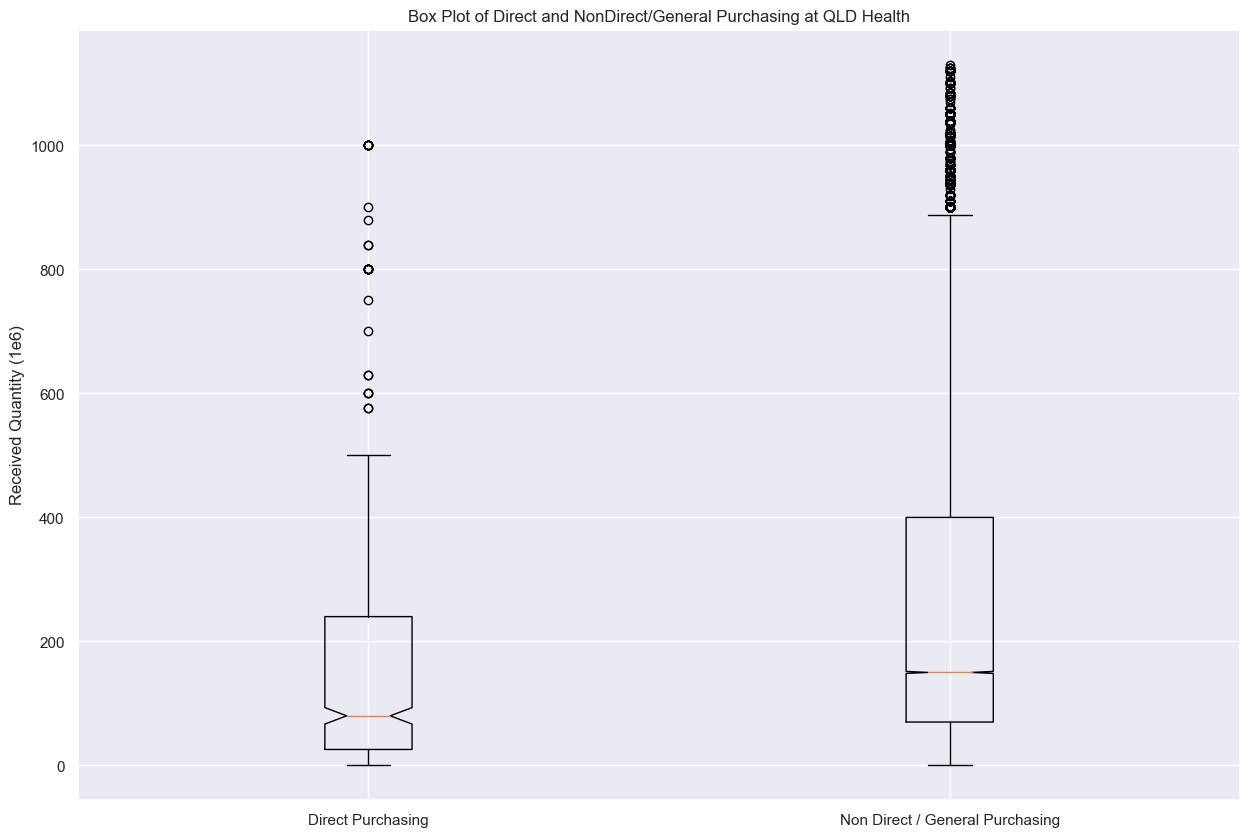

In [95]:
bp=plt.boxplot((Direct['Qty_Receipted_BUOM'], NonDirect['Qty_Receipted_BUOM']), labels=['Direct Purchasing', 'Non Direct / General Purchasing'], notch='True')
plt.title("Box Plot of Direct and NonDirect/General Purchasing at QLD Health")
plt.ylabel('Received Quantity (1e6)')


In [96]:
Direct.head()

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM,Not_CSR_Item,Direct_Purchasing
3,4301943597,Apron,Rural & Community Health: WB:Correctional Cen,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
4,4301947250,Apron,Maryborough Hospital:Operational Serv,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
5,4301958897,Apron,Rural & Community Health: TV:Main Store,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
6,4302023811,Apron,Pathology Qld:Logan Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,1000.0,False,True
12,4302234226,Apron,Pathology Qld:SCUH Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,500.0,False,True


In [97]:
#check how many Direct vs Non Direct purchases there are in the data frame
POdata.Not_CSR_Item.value_counts()

False    91595
True     10443
Name: Not_CSR_Item, dtype: int64

Text(0.5, 1.0, 'Direct orders of CSR items')

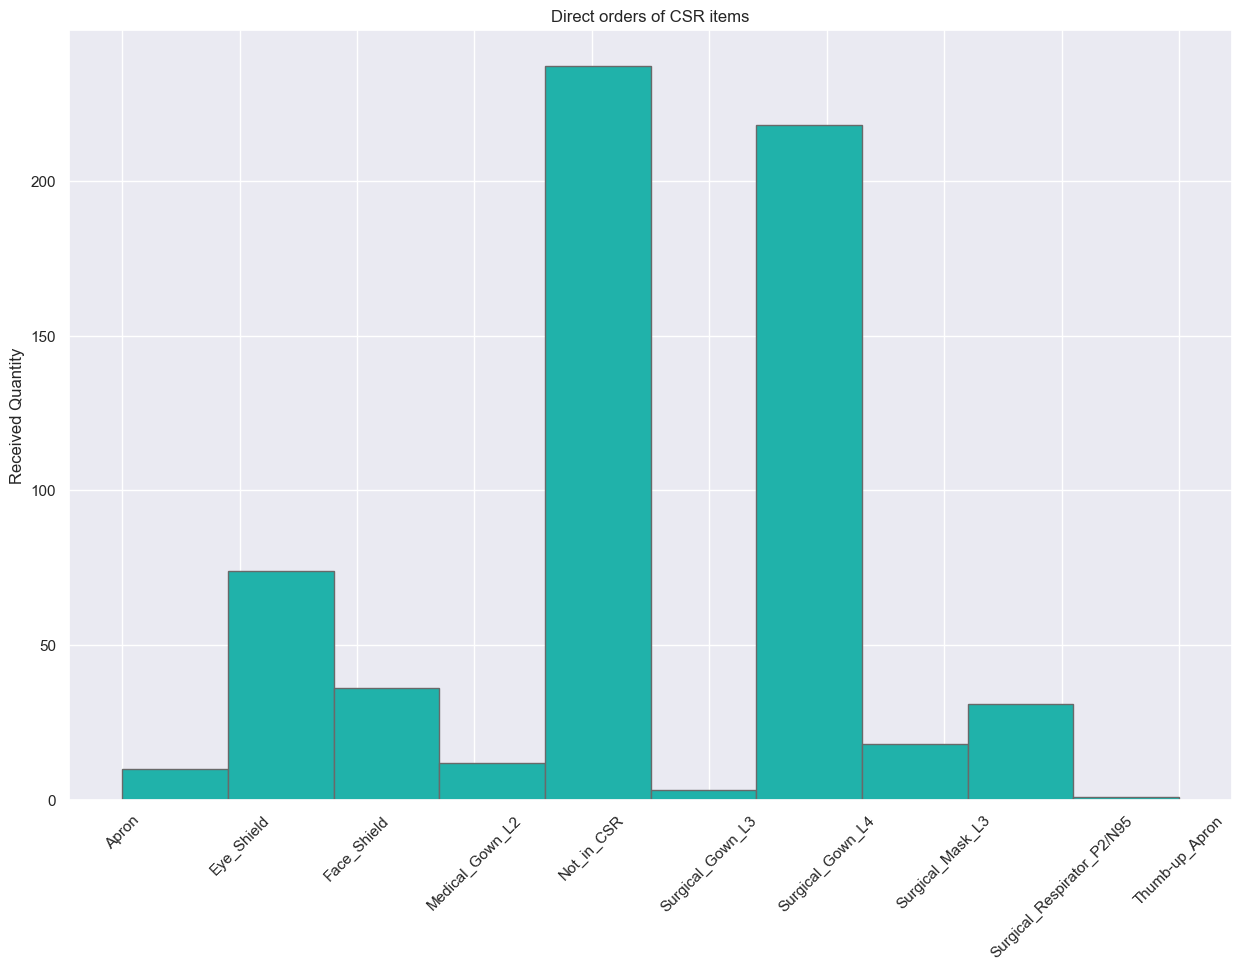

In [98]:
#histogram of the CSR ordering qty
plt.hist(Direct.Subcategory, facecolor='lightseagreen', edgecolor='dimgray')
plt.xticks(rotation = 45) 
plt.ylabel('Received Quantity')
plt.title('Direct orders of CSR items')

Text(0.5, 1.0, 'NonDirect/General orders of CSR items')

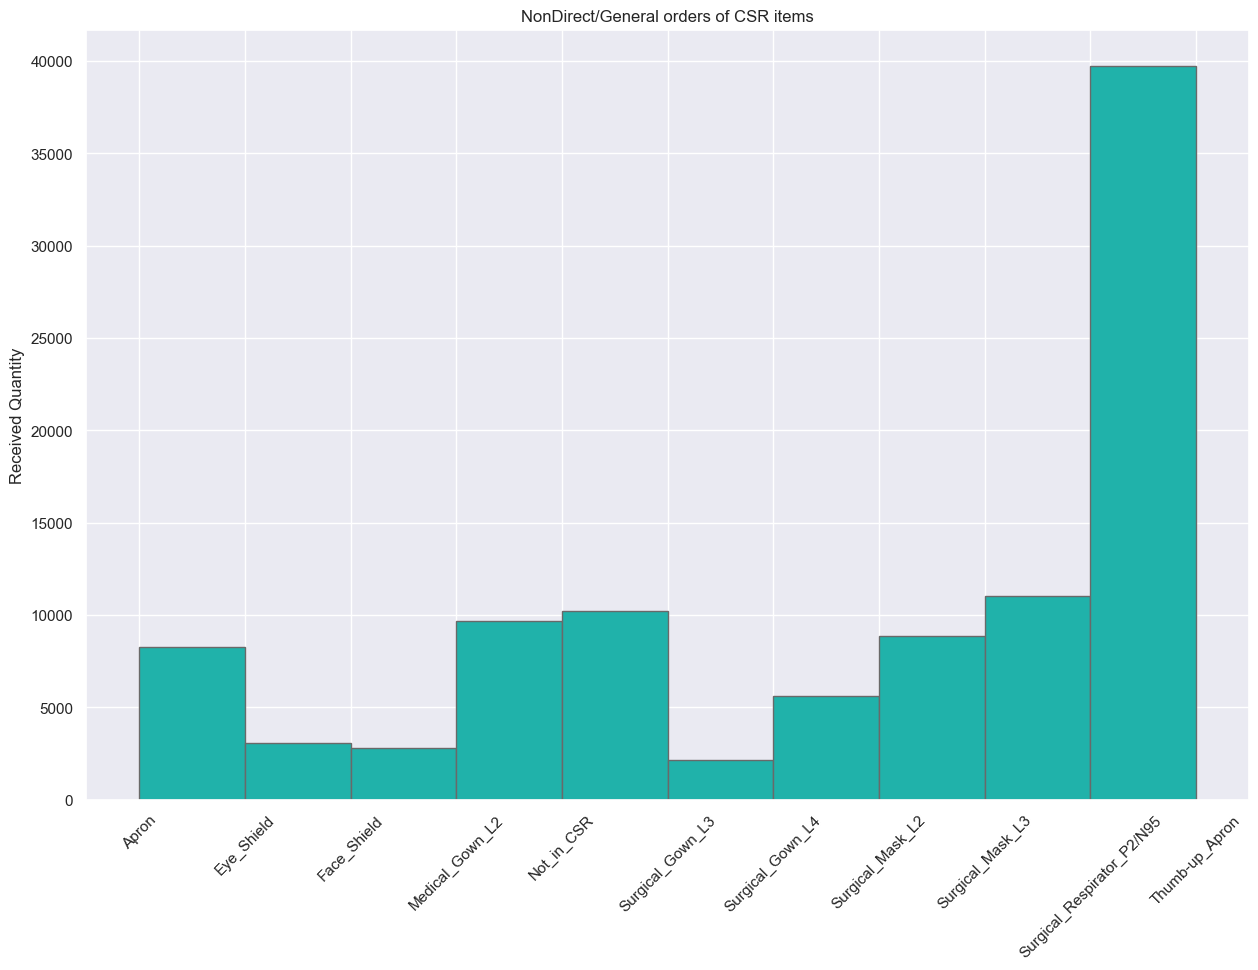

In [99]:
#histogram of the CSR ordering qty
plt.hist(NonDirect.Subcategory, facecolor='lightseagreen', edgecolor='dimgray')
plt.xticks(rotation = 45) 
plt.ylabel('Received Quantity')
plt.title('NonDirect/General orders of CSR items')


<p style="font-family: Arial; font-size:1.4em;color:green;"> Hypothesis Testing </p>

Define the hypothesis

H0: There is no direct purchasing of CSR items

H1: There is direct purchasing of CSR items

In [101]:
POdata['Not_CSR_Item'].value_counts(normalize=True)

False    0.897656
True     0.102344
Name: Not_CSR_Item, dtype: float64

In [102]:
POdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PO Number,102038.0,NaN,NaN,NaN,3979785865.972726,1119997270.293634,81078530.0,4301961061.0,4302193970.0,4302384088.25,4302644541.0
Subcategory,102038,11,Surgical_Respirator_P2/N95,32121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Receiver,102038,2233,Redcliffe Hospital:Operating Theatr,854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Receiver_Lane,102038,46,SEQDC:HHS,56053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_Type,102038,13,D. DEMAND SEQDC,56233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material Number,102038.0,NaN,NaN,NaN,10152760.466395,177222.257306,10000974.0,10019056.0,10038088.0,10401937.0,10431075.0
Qty_Receipted_BUOM,102038.0,NaN,NaN,NaN,251.607695,253.557753,1.0,64.0,150.0,400.0,1130.0
Not_CSR_Item,102038,2,False,91595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Direct_Purchasing,102038,2,False,101398,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
Direct = POdata[POdata['Order_Type'] == 'C. DIRECT SUPPLY'].sample(100, random_state=42)
NonDirect = POdata[POdata['Order_Type'] != 'C. DIRECT SUPPLY'].sample(100, random_state=42)

In [104]:
Direct['Qty_Receipted_BUOM'].value_counts()

24.0      12
100.0      7
40.0       7
400.0      6
80.0       6
120.0      6
20.0       5
500.0      5
250.0      5
50.0       5
60.0       5
200.0      4
25.0       3
630.0      2
1000.0     2
576.0      2
240.0      2
150.0      2
75.0       2
12.0       2
600.0      1
408.0      1
700.0      1
800.0      1
300.0      1
320.0      1
6.0        1
5.0        1
48.0       1
144.0      1
Name: Qty_Receipted_BUOM, dtype: int64

In [105]:
NonDirect['Qty_Receipted_BUOM'].value_counts()

100.0     10
200.0      8
400.0      7
50.0       7
500.0      7
300.0      6
60.0       4
20.0       4
56.0       4
105.0      3
40.0       3
600.0      3
10.0       3
150.0      3
30.0       3
1000.0     2
140.0      2
70.0       2
960.0      2
28.0       2
35.0       2
75.0       1
54.0       1
420.0      1
160.0      1
480.0      1
25.0       1
250.0      1
550.0      1
280.0      1
175.0      1
168.0      1
225.0      1
240.0      1
Name: Qty_Receipted_BUOM, dtype: int64

In [106]:
N = 100
a = Direct['Qty_Receipted_BUOM']
b = NonDirect['Qty_Receipted_BUOM']

In [107]:
#set the alpha
alpha = 0.05

In [108]:
#calculate point estimate
a = Direct['Qty_Receipted_BUOM']
b = NonDirect['Qty_Receipted_BUOM']

In [109]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [110]:
var_a

49306.92929292929

In [111]:
var_b

52395.81929292934

In [112]:
s

225.5024928751993

In [113]:
#Calculate test statistic

t = (a.mean() - b.mean()) / (s * np.sqrt(2 / N))  # t-statistic
t

-0.9805314684454699

In [114]:
#find the P Value
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [115]:
print("t = " + str(t))
print("p = " + str(2*p))

t = -0.9805314684454699
p = 0.3280204069765116


In [116]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b, equal_var=False)
print("t = " + str(t2))
print("p = " + str(p2))


t = -0.98053146844547
p = 0.3280215093569443


<p style="font-family: Arial; font-size:1.4em;color:green;"> Next Steps </p>

In [117]:
POdata.head()

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM,Not_CSR_Item,Direct_Purchasing
3,4301943597,Apron,Rural & Community Health: WB:Correctional Cen,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
4,4301947250,Apron,Maryborough Hospital:Operational Serv,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
5,4301958897,Apron,Rural & Community Health: TV:Main Store,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
6,4302023811,Apron,Pathology Qld:Logan Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,1000.0,False,True
12,4302234226,Apron,Pathology Qld:SCUH Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,500.0,False,True


In [118]:
POdatadp=POdata.loc[POdata.Direct_Purchasing == 1]

In [119]:
POdatadpcsr=POdatadp.loc[POdatadp.Not_CSR_Item == 0]

In [120]:
POdatadpcsr.describe()

,PO Number,Material Number,Qty_Receipted_BUOM
count,4.030000e+02,4.030000e+02,403.000000
mean,4.302210e+09,1.024058e+07,176.173697
std,2.610261e+05,1.844574e+05,207.515137
min,4.301824e+09,1.000137e+07,1.000000
25%,4.301933e+09,1.003242e+07,40.000000
50%,4.302222e+09,1.040228e+07,100.000000
75%,4.302442e+09,1.040272e+07,240.000000
max,4.302639e+09,1.040273e+07,1000.000000


In [ ]:
#histogram of the CSR ordering qty
plt.hist(POdatadpcsr.Subcategory, facecolor='lightseagreen', edgecolor='dimgray')
plt.xticks(rotation = 45) 
plt.ylabel('Received Quantity')
plt.title('Direct orders of CSR items by Subcategory')

(array([350.,   0.,   0.,  51.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

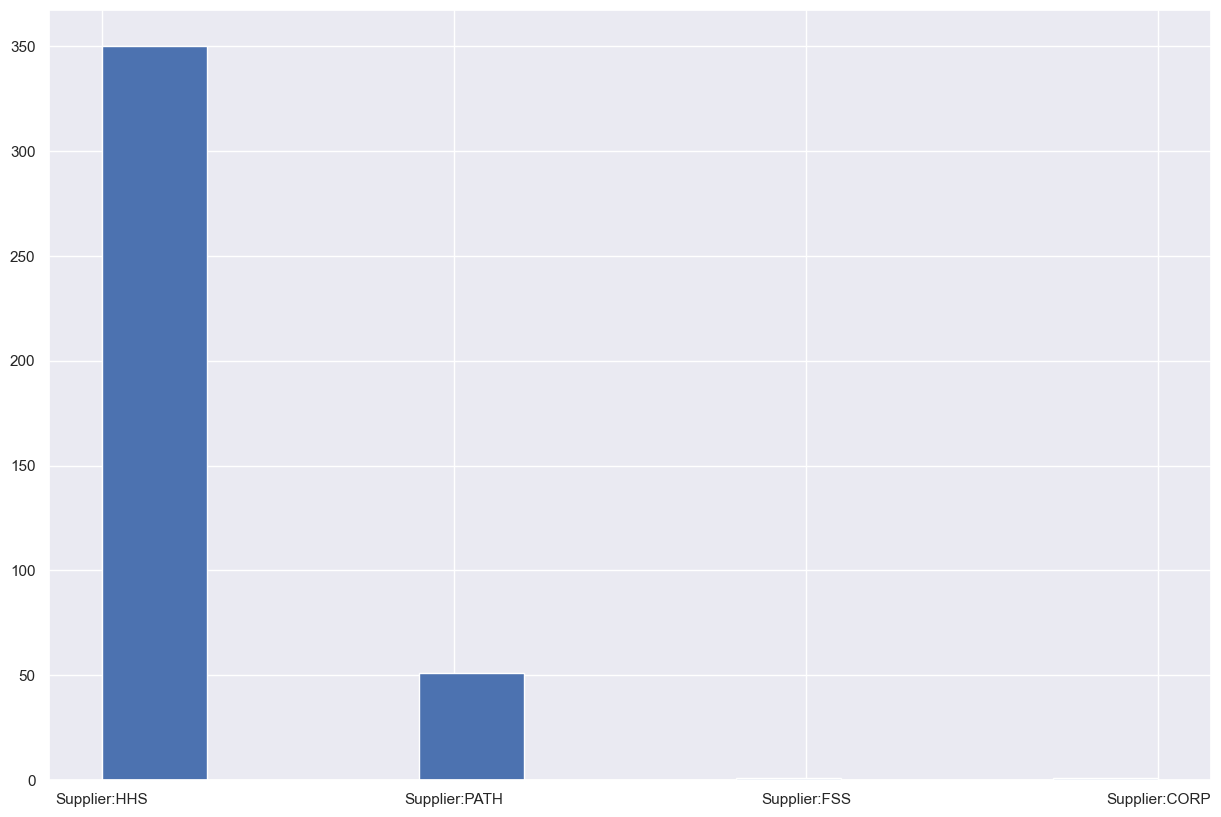

In [122]:
#histogram of the CSR ordering qty
plt.hist(POdatadpcsr.Receiver_Lane)

In [123]:
POdatadpcsr.head(10)

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM,Not_CSR_Item,Direct_Purchasing
3,4301943597,Apron,Rural & Community Health: WB:Correctional Cen,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
4,4301947250,Apron,Maryborough Hospital:Operational Serv,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
5,4301958897,Apron,Rural & Community Health: TV:Main Store,Supplier:HHS,C. DIRECT SUPPLY,10015125,500.0,False,True
6,4302023811,Apron,Pathology Qld:Logan Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,1000.0,False,True
12,4302234226,Apron,Pathology Qld:SCUH Path Store,Supplier:PATH,C. DIRECT SUPPLY,10015125,500.0,False,True
14,4302275000,Apron,Pathology Qld:GCUH Path & Educ,Supplier:PATH,C. DIRECT SUPPLY,10015125,1000.0,False,True
17,4302378440,Apron,Rockhampton Hospital:Ext Medical Ward,Supplier:HHS,C. DIRECT SUPPLY,10401937,1000.0,False,True
22,4302480431,Apron,Pathology Qld:TPCH Anat Path,Supplier:PATH,C. DIRECT SUPPLY,10015125,500.0,False,True
23,4302516905,Apron,Pathology Qld:Cairns Path Stor,Supplier:PATH,C. DIRECT SUPPLY,10015125,500.0,False,True
33,4302618590,Apron,Pathology Qld:RBWH Path Lab,Supplier:PATH,C. DIRECT SUPPLY,10015125,500.0,False,True


In [124]:
POdatanotdp=POdata.loc[POdata.Direct_Purchasing == 0]

In [125]:
POdatanotdp.head(10)

,PO Number,Subcategory,Receiver,Receiver_Lane,Order_Type,Material Number,Qty_Receipted_BUOM,Not_CSR_Item,Direct_Purchasing
35,4301823896,Apron,Caboolture Hospital:Cater Servs Blk,SEQDC:HHS,D. DEMAND SEQDC,10015125,1000.0,False,False
36,4301825493,Apron,Sunshine Coast University Hosp:Endo/02ENDO15,SEQDC:HHS,D. DEMAND SEQDC,10015125,100.0,False,False
37,4301825495,Apron,Sunshine Coast University Hosp:Ward 3A/03W6A080,SEQDC:HHS,D. DEMAND SEQDC,10015125,1000.0,False,False
38,4301825504,Apron,Sunshine Coast University Hosp:MH Adult,SEQDC:HHS,D. DEMAND SEQDC,10015125,400.0,False,False
39,4301825612,Apron,Caboolture Hospital:Paediatric Ward,SEQDC:HHS,D. DEMAND SEQDC,10015125,500.0,False,False
40,4301825616,Apron,Caboolture Hospital:Ward 3B Main Str,SEQDC:HHS,D. DEMAND SEQDC,10015125,1000.0,False,False
41,4301825617,Apron,Caboolture Hospital:Kilcoy Patn Serv,SEQDC:HHS,D. DEMAND SEQDC,10015125,500.0,False,False
42,4301825638,Apron,Redcliffe Hospital:CT Scanner Room,SEQDC:HHS,D. DEMAND SEQDC,10015125,100.0,False,False
43,4301825640,Apron,Redcliffe Hospital:Ward 6 West,SEQDC:HHS,D. DEMAND SEQDC,10015125,200.0,False,False
44,4301825641,Apron,Redcliffe Hospital:Ward 4 East,SEQDC:HHS,D. DEMAND SEQDC,10015125,400.0,False,False
